In [1]:

import tensorflow as tf
# cmd 창에서 pip3 install tensorflow
import numpy as np

/Users/bpu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# loading MNIST dataset 
from tensorflow.examples.tutorials.mnist import input_data
mnist =input_data.read_data_sets ("MNIST_data/", one_hot= True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist.train.images
mnist.train.images.shape

(55000, 784)

In [4]:
mnist.test.labels[1]
mnist.train.num_examples

55000

In [5]:
# define.py
classes = 10
learning_rate = 0.01
training_epochs = 50 
batch_size = 100

In [6]:
# input placeholders 
# MNIST data image of shape 28*28 = 784
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1,28,28,1]) # img 28*28*1 grayscale


# 0~9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, classes])
print(X)
print(Y)

Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


In [7]:
#Input Image shape = (?,28,28,1)
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev = 0.01)) # 3*3 필터, color = 1, 필터개수= 32

print(W1)

Instructions for updating:
Colocations handled automatically by placer.
<tf.Variable 'Variable:0' shape=(3, 3, 1, 32) dtype=float32_ref>


In [8]:
#Convolution Operation -> (?, 28,28,32)
L1 = tf.nn.conv2d(X_img, W1, strides =[1,1,1,1], padding='SAME') # strides = 개수, 1*1 stride, 1 channel, 패딩결과사이즈 이전과 같음

#Polling -> (?,14,14,32)
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides =[1,2,2,1], padding='SAME') # padding 결과 사이즈 같음 
print(L1)

Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


In [9]:
# L2 image input shape =(?,14,14,32)

W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01)) #3*3 필터, 32개 input개수, 64개 필터 

# Convolutional Operation ->(?,14,14,64)
L2 = tf.nn.conv2d(L1,W2, strides =[1,1,1,1], padding ="SAME")
L2 = tf.nn.relu(L2)
# Max-pooling ->(?,7,7,64) 
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding ="SAME")

In [10]:
# reshape 
L2 = tf.reshape(L2,[-1,7*7*64]) #(?,3136)
print(L2)

Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)


In [11]:
# Fully Connnected Layers
# FC 7*7*64 inputs -> 10 classes 
W3= tf.get_variable("W3",shape=[7*7*64,10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))

hypothesis = tf.matmul(L2, W3)+ b
print(hypothesis)

Tensor("add:0", shape=(?, 10), dtype=float32)


In [12]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits =hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [13]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [14]:
# train my model 
print('Learning has been started. It takes lots of time')

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y:batch_ys}
        c,_ = sess.run ([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print('Epoch:', '%04d'%(epoch+1), 'cost=', '{:.9f}'.format(avg_cost))
print('Learning Finished')

Learning has been started. It takes lots of time
Epoch: 0001 cost= 0.159484727
Epoch: 0002 cost= 0.049517066
Epoch: 0003 cost= 0.038793804
Epoch: 0004 cost= 0.031421943
Epoch: 0005 cost= 0.028972152
Epoch: 0006 cost= 0.024219679
Epoch: 0007 cost= 0.021181253
Epoch: 0008 cost= 0.020393703
Epoch: 0009 cost= 0.022608230
Epoch: 0010 cost= 0.021216209
Epoch: 0011 cost= 0.021706430
Epoch: 0012 cost= 0.018802695
Epoch: 0013 cost= 0.016680570
Epoch: 0014 cost= 0.016122088
Epoch: 0015 cost= 0.018734429
Epoch: 0016 cost= 0.024810960
Epoch: 0017 cost= 0.018189793
Epoch: 0018 cost= 0.014946231
Epoch: 0019 cost= 0.019818388
Epoch: 0020 cost= 0.017368593
Epoch: 0021 cost= 0.020058941
Epoch: 0022 cost= 0.023923696
Epoch: 0023 cost= 0.016036870
Epoch: 0024 cost= 0.022463274
Epoch: 0025 cost= 0.015618750
Epoch: 0026 cost= 0.009258327
Epoch: 0027 cost= 0.021400619
Epoch: 0028 cost= 0.019242406
Epoch: 0029 cost= 0.014723352
Epoch: 0030 cost= 0.021638873
Epoch: 0031 cost= 0.021993379
Epoch: 0032 cost= 0.0

In [16]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict = {X: mnist.test.images, Y:mnist.test.labels}))

Accuracy: 0.9893


In [24]:
# Get on and predict 
import random

r = random.randint(0, mnist.test.num_examples -1)
print(r)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("Prediction:", sess.run(tf.argmax(hypothesis,1), feed_dict={X:mnist.test.images[r:r+1]}))


432
Label: [4]
Prediction: [4]


In [25]:
import matplotlib.pyplot as plt

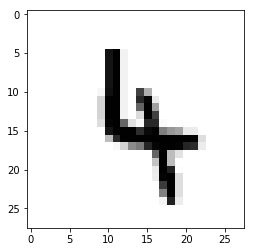

In [26]:
plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap="Greys", interpolation ='nearest')
plt.show()